In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4461900127833204244
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6041067433385883848
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10668487476
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15497319031094772062
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9383654996205358588
physical_device_desc: "device: XLA_GPU device"
]


In [2]:
%config IPCompleter.greedy=True
from keras import backend as K
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import  load_model,Sequential
from keras.optimizers import RMSprop, Adam, SGD
from keras.utils import to_categorical
import numpy as np
import keras
from matplotlib import *
from keras import layers
from keras import models
import sys
import pickle
from keras.models import Model
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import h5py
import os
from datetime import datetime
import sys
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import logging

Using TensorFlow backend.


In [3]:
formatter = logging.Formatter('%(asctime)s :: %(name)s :: %(funcName)s :: %(lineno)d - %(message)s', datefmt='%d-%b-%y %H:%M:%s')
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
file_handler = logging.FileHandler('GPU_train_350.log')
file_handler.setLevel(logging.INFO)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

In [4]:
start_time = datetime.now()

In [5]:
logger.info('process using {}'.format(K.tensorflow_backend._get_available_gpus()))
print('process using {}'.format(K.tensorflow_backend._get_available_gpus()))

W0916 01:04:54.698283 140602545932096 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/Tf_Gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0916 01:04:54.699717 140602545932096 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/Tf_Gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0916 01:04:54.700829 140602545932096 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/Tf_Gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0916 01:04:54.713170 140602545932096 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/Tf_Gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is depre

process using ['/job:localhost/replica:0/task:0/device:GPU:0']


In [6]:
test_path=os.path.abspath("/home/dv-lab/Documents/SAMPLES/350/Test_Data")
val_path=os.path.abspath("/home/dv-lab/Documents/SAMPLES/350/Val_Data")
train_path=os.path.abspath("/home/dv-lab/Documents/SAMPLES/350/Train_Data")

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(str(train_path), 
                                                 target_size = (20, 20),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(str(test_path), 
                                            target_size = (20, 20),
                                            batch_size = 8,
                                            class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(str(val_path),
                                            target_size = (20, 20),
                                            batch_size=8,
                                            class_mode='categorical')
logger.info('training data set loaded from {}'.format(str(train_path)))
logger.info('test data set available in {}'.format(str(test_path)))
logger.info('Validation data set loaded from {}'.format(str(val_path)))

Found 3500 images belonging to 10 classes.
Found 140 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


I0916 01:04:55.287595 140602545932096 <ipython-input-7-2d51de9e5fb5>:21] training data set loaded from /home/dv-lab/Documents/SAMPLES/350/Train_Data
I0916 01:04:55.289047 140602545932096 <ipython-input-7-2d51de9e5fb5>:22] test data set available in /home/dv-lab/Documents/SAMPLES/350/Test_Data
I0916 01:04:55.290364 140602545932096 <ipython-input-7-2d51de9e5fb5>:23] Validation data set loaded from /home/dv-lab/Documents/SAMPLES/350/Val_Data


In [8]:
logger.info('Training started')
classifier = Sequential()
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(20,20,3), activation='tanh', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5), activation='tanh', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='tanh'))
model.add(layers.Dense(84, activation='tanh'))

model.add(layers.Dense(10, activation='tanh'))

model.summary()

I0916 01:04:55.304534 140602545932096 <ipython-input-8-40ea157f981b>:1] Training started
W0916 01:04:55.305872 140602545932096 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/Tf_Gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 01:04:55.324500 140602545932096 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/Tf_Gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 6)         456       
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 6)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               7800      
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

W0916 01:04:55.406226 140602545932096 deprecation_wrapper.py:119] From /home/dv-lab/anaconda3/envs/Tf_Gpu/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
#https://datascience.stackexchange.com/questions/29719/how-to-set-batch-size-steps-per-epoch-and-validation-steps
history = model.fit_generator(generator=training_set,
                    steps_per_epoch=100,          
                    validation_data=test_set,
                    validation_steps=20,
                    epochs=50
)

W0916 01:04:55.558519 140602545932096 deprecation.py:323] From /home/dv-lab/anaconda3/envs/Tf_Gpu/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
80/80 [==============================] - 40s 495ms/step - loss: 7.8507 - acc: 0.0938 - val_loss: 8.0590 - val_acc: 0.1026
Epoch 2/50
80/80 [==============================] - 36s 447ms/step - loss: 8.0590 - acc: 0.0969 - val_loss: 7.9557 - val_acc: 0.0962
Epoch 3/50
80/80 [==============================] - 36s 446ms/step - loss: 8.4116 - acc: 0.1000 - val_loss: 8.5757 - val_acc: 0.1026
Epoch 4/50
80/80 [==============================] - 36s 450ms/step - loss: 8.3361 - acc: 0.1188 - val_loss: 7.6458 - val_acc: 0.0769
Epoch 5/50
80/80 [==============================] - 36s 452ms/step - loss: 7.6561 - acc: 0.1016 - val_loss: 7.8524 - val_acc: 0.1090
Epoch 6/50
80/80 [==============================] - 36s 445ms/step - loss: 8.1094 - acc: 0.0922 - val_loss: 8.1624 - val_acc: 0.1282
Epoch 7/50
80/80 [==============================] - 35s 439ms/step - loss: 8.1094 - acc: 0.0938 - val_loss: 8.0590 - val_acc: 0.0833
Epoch 8/50
80/80 [==============================] - 36s 446ms/step - 

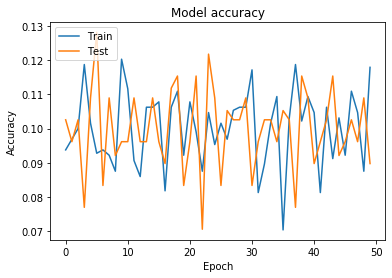

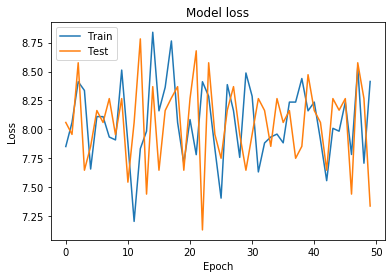

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
for layer in model.layers:
# check for convolutional layer
    if 'conv' not in layer.name:
        continue
# get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_1 (5, 5, 3, 6)
conv2d_2 (5, 5, 6, 16)


In [13]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

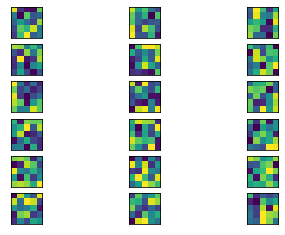

In [14]:
from matplotlib import *
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j])
        ix += 1
# show the figure
pyplot.show()

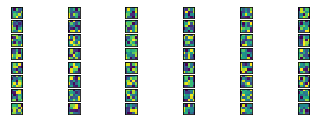

In [15]:
n_filters, ix = 16, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 6, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j])
        ix += 1
# show the figure
pyplot.show()

In [16]:
model.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    'trainable': True,
    'batch_input_shape': (None, 20, 20, 3),
    'dtype': 'float32',
    'filters': 6,
    'kernel_size': (5, 5),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'AveragePooling2D',
   'config': {'name': 'average_pooling2d_1',
    'trainable': True,
    'pool_size': (2, 2),
    'padding': 'valid',
    'strides': (2, 2),
    'data_format': 'channels_last'}},
  

In [17]:
model.get_layer(name="dense_1").input_shape

(None, 64)

In [18]:
model.get_layer(name="dense_2").input_shape

(None, 120)

In [19]:
model.get_layer(name="dense_3").input_shape

(None, 84)

In [20]:
print(model.get_layer(name="dense_3").get_weights()[0].flatten)

<built-in method flatten of numpy.ndarray object at 0x7fdf945014e0>


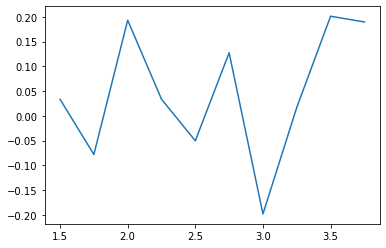

In [21]:
t=np.linspace(1.5, 3.75, 10)
w=model.get_layer(name="dense_3").get_weights()[0][0].flatten()
plt.plot(t,w)

In [22]:
end_time = datetime.now()
logger.info('program execution ended at {}'. format(end_time))
logger.info('Total run time {}'. format(end_time-start_time))
logger.info('Program ended \n---------------------------------------------------------------------------------------------------------------------------------------')

I0916 01:34:45.651297 140602545932096 <ipython-input-22-6967a99a90e4>:2] program execution ended at 2019-09-16 01:34:45.651223
I0916 01:34:45.652653 140602545932096 <ipython-input-22-6967a99a90e4>:3] Total run time 0:29:51.003119
I0916 01:34:45.653821 140602545932096 <ipython-input-22-6967a99a90e4>:4] Program ended 
---------------------------------------------------------------------------------------------------------------------------------------
